In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
con_nodsr_p_sg_ = pd.read_csv('sg_data/con_nodsr_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
con_nodsr_c_sg_ = pd.read_csv('sg_data/con_nodsr_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
con_nodsr_obj_ = pd.read_csv('sg_data/con_nodsr_2018_obj_.csv')


scale_alt_p_drive = pd.read_csv('sg_data/scale_alt_drive_2018_plyr_.csv')
scale_alt_p_appr = pd.read_csv('sg_data/scale_alt_appr_2018_plyr_.csv')
scale_alt_p_short = pd.read_csv('sg_data/scale_alt_short_2018_plyr_.csv')
scale_alt_p_putt = pd.read_csv('sg_data/scale_alt_putt_2018_plyr_.csv')
scale_alt_p_total = pd.read_csv('sg_data/scale_alt_total_2018_plyr_.csv')

scale_alt_h_drive = pd.read_csv('sg_data/scale_alt_drive_2018_h_sg_.csv')
scale_alt_h_appr = pd.read_csv('sg_data/scale_alt_appr_2018_h_sg_.csv')
scale_alt_h_short = pd.read_csv('sg_data/scale_alt_short_2018_h_sg_.csv')
scale_alt_h_putt = pd.read_csv('sg_data/scale_alt_putt_2018_h_sg_.csv')
scale_alt_h_total = pd.read_csv('sg_data/scale_alt_total_2018_h_sg_.csv')

scale_alt_h_dsr_drive = pd.read_csv('sg_data/scale_alt_drive_2018_h_dsr_.csv')
scale_alt_h_dsr_appr = pd.read_csv('sg_data/scale_alt_appr_2018_h_dsr_.csv')
scale_alt_h_dsr_short = pd.read_csv('sg_data/scale_alt_short_2018_h_dsr_.csv')
scale_alt_h_dsr_putt = pd.read_csv('sg_data/scale_alt_putt_2018_h_dsr_.csv')
scale_alt_h_dsr_total = pd.read_csv('sg_data/scale_alt_total_2018_h_dsr_.csv')


scale_alt_p_df = pd.DataFrame({'p_idx': scale_alt_p_drive['idx'],'player': scale_alt_p_drive['player'],'rounds': scale_alt_p_drive['num_rounds'],'sg_drive': scale_alt_p_drive['sg_drive'], 'sg_appr': scale_alt_p_appr['sg_appr'], 'sg_short': scale_alt_p_short['sg_short'], 'sg_putt': scale_alt_p_putt['sg_putt'], 'sg_total': scale_alt_p_total['sg_total']})
scale_alt_h_df = pd.DataFrame({'c_idx': scale_alt_h_drive['idx'],'course_name': scale_alt_h_drive['course_name'],'sg_drive': scale_alt_h_drive['sg_drive'], 'sg_appr': scale_alt_h_appr['sg_appr'], 'sg_short': scale_alt_h_short['sg_short'], 'sg_putt': scale_alt_h_putt['sg_putt'], 'sg_total': scale_alt_h_total['sg_total']})
scale_alt_h_dsr_df = pd.DataFrame({'c_idx': scale_alt_h_drive['idx'],'course_name': scale_alt_h_drive['course_name'],'dsr_drive': scale_alt_h_dsr_drive['dsr_drive'], 'dsr_appr': scale_alt_h_dsr_appr['dsr_appr'], 'dsr_short': scale_alt_h_dsr_short['dsr_short'], 'dsr_putt': scale_alt_h_dsr_putt['dsr_putt'], 'dsr_total': scale_alt_h_dsr_total['dsr_total']})

scale_alt_p_df['sg_agg_total'] = scale_alt_p_df['sg_drive'] + scale_alt_p_df['sg_appr'] +scale_alt_p_df['sg_short'] +scale_alt_p_df['sg_putt']   
scale_alt_h_df['sg_agg_total'] = scale_alt_h_df['sg_drive'] + scale_alt_h_df['sg_appr'] +scale_alt_h_df['sg_short'] +scale_alt_h_df['sg_putt'] 
scale_alt_h_dsr_df['sg_agg_total'] = scale_alt_h_dsr_df['dsr_drive'] + scale_alt_h_dsr_df['dsr_appr'] +scale_alt_h_dsr_df['dsr_short'] +scale_alt_h_dsr_df['dsr_putt'] 


pred_data = pd.read_csv('C:/Users/Luke/OneDrive/Research/sg_data/pred_round_sg_2018_06152020.csv')
course_raw_avg = pd.DataFrame({'sg_drive_mean':pred_data.groupby(['course_name'])['SG_drive'].mean(),  'sg_appr_mean':pred_data.groupby(['course_name'])['SG_appr'].mean(), 'sg_short_mean':pred_data.groupby(['course_name'])['SG_short'].mean(), 'sg_putt_mean':pred_data.groupby(['course_name'])['SG_putt'].mean()}).reset_index()
player_raw_avg = pd.DataFrame({'sg_drive_mean':pred_data.groupby(['player'])['SG_drive'].mean(),  'sg_appr_mean':pred_data.groupby(['player'])['SG_appr'].mean(), 'sg_short_mean':pred_data.groupby(['player'])['SG_short'].mean(), 'sg_putt_mean':pred_data.groupby(['player'])['SG_putt'].mean()}).reset_index()


#player_raw_avg.to_csv('C:/Users/Luke/OneDrive/Research/sg_data/plyr_raw_avg.csv')
#course_raw_avg.to_csv('C:/Users/Luke/OneDrive/Research/sg_data/course_raw_avg.csv')

In [28]:
course_raw_avg

,course_name,sg_drive_mean,sg_appr_mean,sg_short_mean,sg_putt_mean
0,Aronimink GC,0.821278,0.908906,0.039652,0.433530
1,Bay Hill Club & Lodge,-0.354869,-0.471712,0.073441,-0.016349
2,Bellerive CC,0.115675,0.601286,0.079366,0.114665
3,CC of Jackson,-0.311831,-0.487644,0.045413,-0.139038
4,Club de Golf Chapultepec,1.155172,0.230720,0.291083,-0.566585
5,Colonial CC,-0.404964,0.241322,0.095362,0.172087
6,East Lake GC,0.364239,0.335235,0.043725,0.441682
7,Firestone CC (South),0.697214,0.286065,0.046761,0.031577
8,GC of Houston,-0.744949,0.762939,0.382651,0.324003
9,Glen Abbey GC,0.383255,-0.637373,0.178438,0.234899


In [22]:
scale_alt_p_df.to_csv('test_pdf_0623.csv')
scale_alt_h_df.to_csv('test_cdf_0623.csv')
scale_alt_h_dsr_df.to_csv('test_cdsrdf_0623.csv')

In [18]:
# not needed anymore - for history
# used on round_data
#round_data = pd.read_csv('C:/Users/Luke/OneDrive/Research/sg_data/scaled_round_sg_2018.csv')

#round_data['sg_drive_pred_'] =round_data.apply(lambda row: scale_alt_p_df[scale_alt_p_df['player']== row.player]['sg_drive'].values[0]*scale_alt_h_dsr_df[scale_alt_h_dsr_df['course_name']==row.course_name]['dsr_drive'].values[0]- scale_alt_h_df[scale_alt_h_df['course_name'] == row.course_name]['sg_drive'].values[0] , axis = 1)
#round_data['sg_appr_pred_'] =round_data.apply(lambda row: scale_alt_p_df[scale_alt_p_df['player']== row.player]['sg_appr'].values[0]*scale_alt_h_dsr_df[scale_alt_h_dsr_df['course_name']==row.course_name]['dsr_appr'].values[0] - scale_alt_h_df[scale_alt_h_df['course_name'] == row.course_name]['sg_appr'].values[0] , axis = 1)
#round_data['sg_short_pred_'] =round_data.apply(lambda row: scale_alt_p_df[scale_alt_p_df['player']== row.player]['sg_short'].values[0]*scale_alt_h_dsr_df[scale_alt_h_dsr_df['course_name']==row.course_name]['dsr_short'].values[0]- scale_alt_h_df[scale_alt_h_df['course_name'] == row.course_name]['sg_short'].values[0] , axis = 1)
#round_data['sg_putt_pred_'] =round_data.apply(lambda row: scale_alt_p_df[scale_alt_p_df['player']== row.player]['sg_putt'].values[0]*scale_alt_h_dsr_df[scale_alt_h_dsr_df['course_name']==row.course_name]['dsr_putt'].values[0]- scale_alt_h_df[scale_alt_h_df['course_name'] == row.course_name]['sg_putt'].values[0] , axis = 1)

#round_data['sg_total_pred_'] = round_data['sg_drive_pred_']+ round_data['sg_appr_pred_'] +round_data['sg_short_pred_']+round_data['sg_putt_pred_']
#round_data['sg_total'] = round_data['SG_short'] + round_data['SG_drive'] + round_data['SG_short'] + round_data['SG_putt']

#round_data.to_csv('C:/Users/Luke/OneDrive/Research/sg_data/pred_round_sg_2018_06152020.csv')



# By category

# Exploratory and model variations

In [3]:
# total rmse using original w/constraints predictions
print('TOTAL SG RMSE:\n', np.sqrt(mean_squared_error(pred_data['sg_total'], pred_data['sg_total_pred_'])))

TOTAL SG RMSE:
 2.9928899580028796


# No DSR

In [4]:
con_nodsr_p_sg_['sg_total_agg'] = con_nodsr_p_sg_['sg_drive']+con_nodsr_p_sg_['sg_appr']+con_nodsr_p_sg_['sg_short']+con_nodsr_p_sg_['sg_putt']

verbose = False
if verbose:
    print('PLAYERS')
    print()
    print(con_nodsr_p_sg_[con_nodsr_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(con_nodsr_p_sg_[con_nodsr_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(con_nodsr_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(con_nodsr_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()


# Differences between raw_avg, no_dsr, model

In [15]:
p_raw_vs_nodsr = player_raw_avg.copy()
p_raw_vs_nodsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']]= np.array(p_raw_vs_nodsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']])-np.array(con_nodsr_p_sg_[['sg_drive','sg_appr','sg_short','sg_putt']])

p_raw_vs_dsr = player_raw_avg.copy()
p_raw_vs_dsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']]= np.array(p_raw_vs_dsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']])-np.array(scale_alt_p_df[['sg_drive','sg_appr','sg_short','sg_putt']])

p_nodsr_vs_dsr = con_nodsr_p_sg_.copy()
p_nodsr_vs_dsr[['sg_drive','sg_appr','sg_short','sg_putt']] = np.array(con_nodsr_p_sg_[['sg_drive','sg_appr','sg_short','sg_putt']])- np.array(scale_alt_p_df[['sg_drive','sg_appr','sg_short','sg_putt']])

c_raw_vs_nodsr = course_raw_avg.copy()
c_raw_vs_nodsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']]= np.array(c_raw_vs_nodsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']])-np.array(con_nodsr_c_sg_[['sg_drive','sg_appr','sg_short','sg_putt']])

c_raw_vs_dsr = course_raw_avg.copy()
c_raw_vs_dsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']]= np.array(c_raw_vs_dsr[['sg_drive_mean','sg_appr_mean','sg_short_mean','sg_putt_mean']])-np.array(scale_alt_c_df[['sg_drive','sg_appr','sg_short','sg_putt']])

c_nodsr_vs_dsr = con_nodsr_c_sg_.copy()
c_nodsr_vs_dsr[['sg_drive','sg_appr','sg_short','sg_putt']] = np.array(con_nodsr_c_sg_[['sg_drive','sg_appr','sg_short','sg_putt']])- np.array(scale_alt_c_df[['sg_drive','sg_appr','sg_short','sg_putt']])


NameError: name 'con_nodsr_c_sg_' is not defined

In [ ]:
use raw_avg to predict every round
FE SG w dsr
FE SG without dsr

keep rmse test values
t-test on 3 above differences

# By Category

In [5]:
verbose = False
if verbose:
    print('PLAYERS')
    print()
    print(p_df[p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(p_df[p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(h_df.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(h_df.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(h_dsr_df.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(h_dsr_df.sort_values(by='sg_agg_total', ascending= False)[-10:])

# Enhanced constraints by category

In [19]:
verbose = False
if verbose:
    print('PLAYERS')
    print()
    print(enh_p_df[enh_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(enh_p_df[enh_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(enh_h_df.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(enh_h_df.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(enh_h_dsr_df.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(enh_h_dsr_df.sort_values(by='dsr_total', ascending= False)[-10:])

# Scaled

In [29]:
verbose = False
if verbose:
    print('PLAYERS')
    print()
    print(scale_p_df[scale_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(scale_p_df[scale_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(scale_h_df.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(scale_h_df.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(scale_h_dsr_df.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(scale_h_dsr_df.sort_values(by='dsr_total', ascending= False)[-10:])

# Scaled (alt def. p*d -h)

In [69]:
trinity = pred_data[pred_data['course_name']=='Trinity Forest Golf Club']
trinity['p_sg_appr']= trinity['player'].apply(lambda plyr: scale_alt_p_df[scale_alt_p_df['player']== plyr]['sg_appr'].values[0])

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
player = 'Dustin Johnson'
course = 'TPC Sawgrass'

pred_data[pred_data['course_name']==course][pred_data['player']==player]

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,player,course_name,c_idx,p_idx,round,SG_appr,SG_short,SG_drive,SG_putt,sg_drive_pred_,sg_appr_pred_,sg_short_pred_,sg_putt_pred_,sg_total_pred_,sg_total
4463,Dustin Johnson,TPC Sawgrass,29,161,1,2.056330,-0.562398,1.537700,1.919915,0.818505,0.434353,0.021514,0.429461,1.703833,2.332819
4464,Dustin Johnson,TPC Sawgrass,29,161,2,-1.464142,0.803824,1.428950,-1.097085,0.818505,0.434353,0.021514,0.429461,1.703833,1.939514
4465,Dustin Johnson,TPC Sawgrass,29,161,3,-1.846420,0.591130,-0.305078,3.196915,0.818505,0.434353,0.021514,0.429461,1.703833,4.074097
4466,Dustin Johnson,TPC Sawgrass,29,161,4,-0.183086,0.246797,0.781922,-2.430085,0.818505,0.434353,0.021514,0.429461,1.703833,-1.154570


In [64]:
con_nodsr_h_sg_[con_nodsr_h_sg_['course_name']== 'Trinity Forest Golf Club']

,idx,course_name,sg_drive,sg_appr,sg_short,sg_putt,sg_total,rounds
35,35,Trinity Forest Golf Club,-0.997148,-1.267542,0.0202,0.273266,-1.971224,460.0


In [65]:
scale_alt_h_df[scale_alt_h_df['course_name']=='Trinity Forest Golf Club']

,h_idx,course_name,sg_drive,sg_appr,sg_short,sg_putt,sg_total,sg_agg_total
22,35,Trinity Forest Golf Club,-0.969357,-1.16467,0.03078,0.257642,-1.886981,-1.845604


[[1.        0.2292348]
 [0.2292348 1.       ]]
y 1.0158814972787868
x -0.27922742151510405


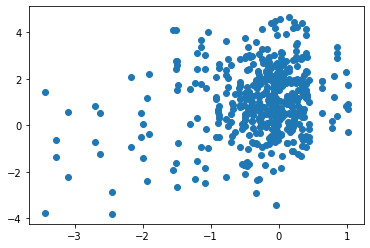

In [68]:
plt.scatter(trinity['p_sg_appr'], trinity['SG_appr'])
print(np.corrcoef(trinity['p_sg_appr'], trinity['SG_appr']))
print('y', np.average(trinity['SG_appr']))
print('x',np.average(trinity['p_sg_appr']))

In [13]:
scale_alt_h_dsr_df.sort_values(by='dsr_appr', ascending= True)

,c_idx,course_name,dsr_drive,dsr_appr,dsr_short,dsr_putt,dsr_total,sg_agg_total
35,16,Plantation Course at Kapalua,1.520316,0.095517,0.356178,1.999985,0.541470,3.971997
3,3,CC of Jackson,0.592694,0.422058,0.502463,1.330073,0.461924,2.847288
22,35,Trinity Forest Golf Club,0.750372,0.499244,0.746826,1.152989,0.772219,3.149432
34,4,Club de Golf Chapultepec,1.615213,0.528066,1.056074,0.588252,0.612830,3.787605
5,8,GC of Houston,1.146107,0.676243,0.456479,0.934775,0.724986,3.213605
10,15,Pebble Beach GL,0.808576,0.721047,1.999905,1.101404,0.797944,4.630932
33,33,The Old White TPC,1.305892,0.733001,0.529493,0.652852,0.873949,3.221238
11,17,Quail Hollow Club,1.178514,0.739167,1.651180,1.831049,1.173899,5.399910
24,0,Aronimink GC,1.136959,0.768061,0.483734,0.571241,1.389686,2.959996
0,1,Bay Hill Club & Lodge,1.338496,0.818276,1.193061,1.298372,1.269529,4.648206


In [6]:
verbose = True
if verbose:
    print('PLAYERS')
    print()
    print(scale_alt_p_df[scale_alt_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(scale_alt_p_df[scale_alt_p_df['rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(scale_alt_h_df.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(scale_alt_h_df.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(scale_alt_h_dsr_df.sort_values(by='dsr_appr', ascending= False)[0:10])
    print('...')
    print(scale_alt_h_dsr_df.sort_values(by='dsr_appr', ascending= False)[-10:])

PLAYERS

     p_idx             player  rounds  sg_drive   sg_appr  sg_short   sg_putt  sg_total  sg_agg_total
161    161     Dustin Johnson    58.0  1.100034  0.974172  0.174821  0.459862  2.644393      2.708889
267    267        Justin Rose    49.0  0.764392  0.715684  0.408827  0.326103  2.507066      2.215005
268    268      Justin Thomas    64.0  0.606472  1.058777  0.218061  0.228092  2.267388      2.111403
74      74  Bryson DeChambeau    74.0  0.763858  0.738026  0.166126  0.381072  2.074527      2.049082
457    457        Tiger Woods    57.0  0.218426  1.070498  0.366655  0.222863  2.068527      1.878442
385    385       Rory McIlroy    49.0  0.936674  0.426843  0.351214  0.342770  1.911965      2.057502
464    464    Tommy Fleetwood    50.0  0.720462  0.593912  0.197617  0.241616  1.907310      1.753606
219    219          Jason Day    47.0  0.412192  0.156700  0.435690  0.804654  1.772069      1.809237
466    466         Tony Finau    77.0  0.658598  0.558050  0.214968  0.15

# Original w Constraints (-5,5)

In [21]:
verbose = False
if verbose:
    print('OBJECTIVE: \n', con_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(con_p_sg_[con_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(con_p_sg_[con_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(con_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(con_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(con_h_dsr_.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(con_h_dsr_.sort_values(by='dsr_total', ascending= False)[-10:])

# Default Restrictive (-3,3) * ignore sg_total column

In [22]:
verbose = False
if verbose:
    print('OBJECTIVE: \n', rest3_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(rest3_p_sg_[rest3_p_sg_['num_rounds']>20].sort_values(by='sg_total_agg', ascending=False)[0:10])
    print('...')
    print(rest3_p_sg_[rest3_p_sg_['num_rounds']>20].sort_values(by='sg_total_agg', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(rest3_h_sg_.sort_values(by='sg_total_agg', ascending= False)[0:10])
    print('...')
    print(rest3_h_sg_.sort_values(by='sg_total_agg', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(rest3_h_dsr_.sort_values(by='dsr_total_agg', ascending= False)[0:10])
    print('...')
    print(rest3_h_dsr_.sort_values(by='dsr_total_agg', ascending= False)[-10:])

# Alternative Formula Definition

In [23]:
verbose = False
if verbose:
    
    print('OBJECTIVE: \n', a_con_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(a_con_p_sg_[a_con_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(a_con_p_sg_[a_con_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(a_con_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(a_con_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(a_con_h_dsr_.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(a_con_h_dsr_.sort_values(by='dsr_total', ascending= False)[-10:])

# Total Only Objective (-5,5)

In [24]:
verbose = False
if verbose:
    print('OBJECTIVE (only 1x for every row): \n', tot_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(tot_p_sg_[tot_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(tot_p_sg_[tot_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(tot_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(tot_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(tot_h_dsr_.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(tot_h_dsr_.sort_values(by='dsr_total', ascending= False)[-10:])

# Total plus default Objective (just pretend total is 5th category)

In [25]:
verbose = False
if verbose:
    print('OBJECTIVE (5x for every row): \n', totp_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(totp_p_sg_[totp_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(totp_p_sg_[totp_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(totp_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(totp_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(totp_h_dsr_.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(totp_h_dsr_.sort_values(by='dsr_total', ascending= False)[-10:])

# Total included as variable w/ variable constraints, but default objective

In [26]:
verbose = False
if verbose:
    print('OBJECTIVE: \n', totc_obj_['obj'].values[0])
    print()
    print('PLAYERS')
    print()
    print(totc_p_sg_[totc_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[0:10])
    print('...')
    print(totc_p_sg_[totc_p_sg_['num_rounds']>20].sort_values(by='sg_total', ascending=False)[-10:])
    print()
    print('HOLE SG')
    print()
    print(totc_h_sg_.sort_values(by='sg_total', ascending= False)[0:10])
    print('...')
    print(totc_h_sg_.sort_values(by='sg_total', ascending= False)[-10:])
    print()
    print('HOLE DSR')
    print()
    print(totc_h_dsr_.sort_values(by='dsr_total', ascending= False)[0:10])
    print('...')
    print(totc_h_dsr_.sort_values(by='dsr_total', ascending= False)[-10:])

# Misc code not used anymore

In [5]:
pred_data = pd.read_csv('C:/Users/Luke/OneDrive/Research/sg_data/pred_round_sg_2018.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1) 

nonsense_p_drive= pd.read_csv('sg_data/nonsense_drive_2018_plyr_.csv')
p_drive = pd.read_csv('sg_data/drive_2018_plyr_.csv')
p_appr = pd.read_csv('sg_data/appr_2018_plyr_.csv')
p_short = pd.read_csv('sg_data/short_2018_plyr_.csv')
p_putt = pd.read_csv('sg_data/putt_2018_plyr_.csv')
p_total = pd.read_csv('sg_data/total_2018_plyr_.csv')

nonsense_h_drive= pd.read_csv('sg_data/nonsense_drive_2018_h_sg_.csv')
h_drive = pd.read_csv('sg_data/drive_2018_h_sg_.csv')
h_appr = pd.read_csv('sg_data/appr_2018_h_sg_.csv')
h_short = pd.read_csv('sg_data/short_2018_h_sg_.csv')
h_putt = pd.read_csv('sg_data/putt_2018_h_sg_.csv')
h_total = pd.read_csv('sg_data/total_2018_h_sg_.csv')

nonsense_h_dsr_drive= pd.read_csv('sg_data/nonsense_drive_2018_h_dsr_.csv')
h_dsr_drive = pd.read_csv('sg_data/drive_2018_h_dsr_.csv')
h_dsr_appr = pd.read_csv('sg_data/appr_2018_h_dsr_.csv')
h_dsr_short = pd.read_csv('sg_data/short_2018_h_dsr_.csv')
h_dsr_putt = pd.read_csv('sg_data/putt_2018_h_dsr_.csv')
h_dsr_total = pd.read_csv('sg_data/total_2018_h_dsr_.csv')

enh_p_drive = pd.read_csv('sg_data/enh_drive_2018_plyr_.csv')
enh_p_appr = pd.read_csv('sg_data/enh_appr_2018_plyr_.csv')
enh_p_short = pd.read_csv('sg_data/enh_short_2018_plyr_.csv')
enh_p_putt = pd.read_csv('sg_data/enh_putt_2018_plyr_.csv')
enh_p_total = pd.read_csv('sg_data/enh_total_2018_plyr_.csv')

enh_h_drive = pd.read_csv('sg_data/enh_drive_2018_h_sg_.csv')
enh_h_appr = pd.read_csv('sg_data/enh_appr_2018_h_sg_.csv')
enh_h_short = pd.read_csv('sg_data/enh_short_2018_h_sg_.csv')
enh_h_putt = pd.read_csv('sg_data/enh_putt_2018_h_sg_.csv')
enh_h_total = pd.read_csv('sg_data/enh_total_2018_h_sg_.csv')

enh_h_dsr_drive = pd.read_csv('sg_data/enh_drive_2018_h_dsr_.csv')
enh_h_dsr_appr = pd.read_csv('sg_data/enh_appr_2018_h_dsr_.csv')
enh_h_dsr_short = pd.read_csv('sg_data/enh_short_2018_h_dsr_.csv')
enh_h_dsr_putt = pd.read_csv('sg_data/enh_putt_2018_h_dsr_.csv')
enh_h_dsr_total = pd.read_csv('sg_data/enh_total_2018_h_dsr_.csv')


scale_p_drive = pd.read_csv('sg_data/scale_drive_2018_plyr_.csv')
scale_p_appr = pd.read_csv('sg_data/scale_appr_2018_plyr_.csv')
scale_p_short = pd.read_csv('sg_data/scale_short_2018_plyr_.csv')
scale_p_putt = pd.read_csv('sg_data/scale_putt_2018_plyr_.csv')
scale_p_total = pd.read_csv('sg_data/scale_total_2018_plyr_.csv')

scale_h_drive = pd.read_csv('sg_data/scale_drive_2018_h_sg_.csv')
scale_h_appr = pd.read_csv('sg_data/scale_appr_2018_h_sg_.csv')
scale_h_short = pd.read_csv('sg_data/scale_short_2018_h_sg_.csv')
scale_h_putt = pd.read_csv('sg_data/scale_putt_2018_h_sg_.csv')
scale_h_total = pd.read_csv('sg_data/scale_total_2018_h_sg_.csv')

scale_h_dsr_drive = pd.read_csv('sg_data/scale_drive_2018_h_dsr_.csv')
scale_h_dsr_appr = pd.read_csv('sg_data/scale_appr_2018_h_dsr_.csv')
scale_h_dsr_short = pd.read_csv('sg_data/scale_short_2018_h_dsr_.csv')
scale_h_dsr_putt = pd.read_csv('sg_data/scale_putt_2018_h_dsr_.csv')
scale_h_dsr_total = pd.read_csv('sg_data/scale_total_2018_h_dsr_.csv')


scale_alt_p_drive = pd.read_csv('sg_data/scale_alt_drive_2018_plyr_.csv')
scale_alt_p_appr = pd.read_csv('sg_data/scale_alt_appr_2018_plyr_.csv')
scale_alt_p_short = pd.read_csv('sg_data/scale_alt_short_2018_plyr_.csv')
scale_alt_p_putt = pd.read_csv('sg_data/scale_alt_putt_2018_plyr_.csv')
scale_alt_p_total = pd.read_csv('sg_data/scale_alt_total_2018_plyr_.csv')

scale_alt_h_drive = pd.read_csv('sg_data/scale_alt_drive_2018_h_sg_.csv')
scale_alt_h_appr = pd.read_csv('sg_data/scale_alt_appr_2018_h_sg_.csv')
scale_alt_h_short = pd.read_csv('sg_data/scale_alt_short_2018_h_sg_.csv')
scale_alt_h_putt = pd.read_csv('sg_data/scale_alt_putt_2018_h_sg_.csv')
scale_alt_h_total = pd.read_csv('sg_data/scale_alt_total_2018_h_sg_.csv')

scale_alt_h_dsr_drive = pd.read_csv('sg_data/scale_alt_drive_2018_h_dsr_.csv')
scale_alt_h_dsr_appr = pd.read_csv('sg_data/scale_alt_appr_2018_h_dsr_.csv')
scale_alt_h_dsr_short = pd.read_csv('sg_data/scale_alt_short_2018_h_dsr_.csv')
scale_alt_h_dsr_putt = pd.read_csv('sg_data/scale_alt_putt_2018_h_dsr_.csv')
scale_alt_h_dsr_total = pd.read_csv('sg_data/scale_alt_total_2018_h_dsr_.csv')

In [12]:
#p_sg_ = pd.read_csv('sg_data/2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
#h_sg_ = pd.read_csv('sg_data/2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
#h_dsr_ = pd.read_csv('sg_data/2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
#obj_ = pd.read_csv('sg_data/2018_obj_.csv')

nodsr_p_sg_ = pd.read_csv('sg_data/nodsr_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
nodsr_h_sg_ = pd.read_csv('sg_data/nodsr_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
nodsr_obj_ = pd.read_csv('sg_data/nodsr_2018_obj_.csv')

# weights
course_weights = pd.read_csv('C:/Users/Luke/OneDrive/Research/sg_data/round_sg_course_weights.csv')

con_nodsr_p_sg_ = pd.read_csv('sg_data/con_nodsr_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
con_nodsr_h_sg_ = pd.read_csv('sg_data/con_nodsr_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
con_nodsr_obj_ = pd.read_csv('sg_data/con_nodsr_2018_obj_.csv')

con_p_sg_ = pd.read_csv('sg_data/con_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
con_h_sg_ = pd.read_csv('sg_data/con_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
con_h_dsr_ = pd.read_csv('sg_data/con_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
con_obj_ = pd.read_csv('sg_data/con_2018_obj_.csv')

a_con_p_sg_ = pd.read_csv('sg_data/a_con_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
a_con_h_sg_ = pd.read_csv('sg_data/a_con_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
a_con_h_dsr_ = pd.read_csv('sg_data/a_con_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
a_con_obj_ = pd.read_csv('sg_data/a_con_2018_obj_.csv')

tot_p_sg_ = pd.read_csv('sg_data/tot_only_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
tot_h_sg_ = pd.read_csv('sg_data/tot_only_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
tot_h_dsr_ = pd.read_csv('sg_data/tot_only_con_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
tot_obj_ = pd.read_csv('sg_data/tot_only_con_2018_obj_.csv')

totp_p_sg_ = pd.read_csv('sg_data/tot_plus_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
totp_h_sg_ = pd.read_csv('sg_data/tot_plus_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
totp_h_dsr_ = pd.read_csv('sg_data/tot_plus_con_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
totp_obj_ = pd.read_csv('sg_data/tot_plus_con_2018_obj_.csv')

totc_p_sg_ = pd.read_csv('sg_data/tot_con_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
totc_h_sg_ = pd.read_csv('sg_data/tot_con_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
totc_h_dsr_ = pd.read_csv('sg_data/tot_con_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
totc_obj_ = pd.read_csv('sg_data/tot_con_2018_obj_.csv')

rest3_p_sg_ = pd.read_csv('sg_data/rest3_2018_plyr_.csv').sort_values(by = 'player').reset_index(drop=True)
rest3_h_sg_ = pd.read_csv('sg_data/rest3_2018_h_sg_.csv').sort_values(by = 'course_name').reset_index(drop=True)
rest3_h_dsr_ = pd.read_csv('sg_data/rest3_2018_h_dsr_.csv').sort_values(by = 'course_name').reset_index(drop=True)
rest3_obj_ = pd.read_csv('sg_data/rest3_2018_obj_.csv')





con_p_sg_['sg_total'] = con_p_sg_['sg_drive']+con_p_sg_['sg_appr']+con_p_sg_['sg_short']+con_p_sg_['sg_putt']
a_con_p_sg_['sg_total'] = a_con_p_sg_['sg_drive']+a_con_p_sg_['sg_appr']+a_con_p_sg_['sg_short']+a_con_p_sg_['sg_putt']
con_nodsr_p_sg_['sg_total'] = con_nodsr_p_sg_['sg_drive']+con_nodsr_p_sg_['sg_appr']+con_nodsr_p_sg_['sg_short']+con_nodsr_p_sg_['sg_putt']
tot_p_sg_['sg_total_agg'] = tot_p_sg_['sg_drive']+tot_p_sg_['sg_appr']+tot_p_sg_['sg_short']+tot_p_sg_['sg_putt']
totp_p_sg_['sg_total_agg'] = totp_p_sg_['sg_drive']+totp_p_sg_['sg_appr']+totp_p_sg_['sg_short']+totp_p_sg_['sg_putt']
totc_p_sg_['sg_total_agg'] = totc_p_sg_['sg_drive']+totc_p_sg_['sg_appr']+totc_p_sg_['sg_short']+totc_p_sg_['sg_putt']
rest3_p_sg_['sg_total_agg'] = rest3_p_sg_['sg_drive']+rest3_p_sg_['sg_appr']+rest3_p_sg_['sg_short']+rest3_p_sg_['sg_putt']


con_h_sg_['sg_total'] = con_h_sg_['sg_drive']+con_h_sg_['sg_appr']+con_h_sg_['sg_short']+con_h_sg_['sg_putt']
a_con_h_sg_['sg_total'] = a_con_h_sg_['sg_drive']+a_con_h_sg_['sg_appr']+a_con_h_sg_['sg_short']+a_con_h_sg_['sg_putt']
con_nodsr_h_sg_['sg_total'] = con_nodsr_h_sg_['sg_drive']+con_nodsr_h_sg_['sg_appr']+con_nodsr_h_sg_['sg_short']+con_nodsr_h_sg_['sg_putt']
tot_h_sg_['sg_total_agg'] = tot_h_sg_['sg_drive']+tot_h_sg_['sg_appr']+tot_h_sg_['sg_short']+tot_h_sg_['sg_putt']
totp_h_sg_['sg_total_agg'] = totp_h_sg_['sg_drive']+totp_h_sg_['sg_appr']+totp_h_sg_['sg_short']+totp_h_sg_['sg_putt']
totc_h_sg_['sg_total_agg'] = totc_h_sg_['sg_drive']+totc_h_sg_['sg_appr']+totc_h_sg_['sg_short']+totc_h_sg_['sg_putt']
rest3_h_sg_['sg_total_agg'] = rest3_h_sg_['sg_drive']+rest3_h_sg_['sg_appr']+rest3_h_sg_['sg_short']+rest3_h_sg_['sg_putt']


con_h_dsr_['dsr_total'] = con_h_dsr_['dsr_drive']+con_h_dsr_['dsr_appr']+con_h_dsr_['dsr_short']+con_h_dsr_['dsr_putt']
a_con_h_dsr_['dsr_total'] = a_con_h_dsr_['dsr_drive']+a_con_h_dsr_['dsr_appr']+a_con_h_dsr_['dsr_short']+a_con_h_dsr_['dsr_putt']
tot_h_dsr_['dsr_total_agg'] = tot_h_dsr_['dsr_drive']+tot_h_dsr_['dsr_appr']+tot_h_dsr_['dsr_short']+tot_h_dsr_['dsr_putt']
totp_h_dsr_['dsr_total_agg'] = totp_h_dsr_['dsr_drive']+totp_h_dsr_['dsr_appr']+totp_h_dsr_['dsr_short']+totp_h_dsr_['dsr_putt']
totc_h_dsr_['dsr_total_agg'] = totc_h_dsr_['dsr_drive']+totc_h_dsr_['dsr_appr']+totc_h_dsr_['dsr_short']+totc_h_dsr_['dsr_putt']
rest3_h_dsr_['dsr_total_agg'] = rest3_h_dsr_['dsr_drive']+rest3_h_dsr_['dsr_appr']+rest3_h_dsr_['dsr_short']+rest3_h_dsr_['dsr_putt']


con_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
a_con_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
con_nodsr_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
con_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
a_con_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
tot_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
totp_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
totc_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
rest3_h_sg_['rounds'] = course_weights['weight']*len(pred_data)
tot_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
totp_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
totc_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
rest3_h_dsr_['rounds'] = course_weights['weight']*len(pred_data)
enh_h_df['rounds'] = course_weights['weight']*len(pred_data)
enh_h_dsr_df['rounds'] = course_weights['weight']*len(pred_data)


In [7]:
# by category not enhanced constraint
p_df = pd.DataFrame({'p_idx': p_drive['idx'],'player': p_drive['player'],'rounds': p_drive['num_rounds'],'sg_drive': p_drive['sg_drive'], 'sg_appr': p_appr['sg_appr'], 'sg_short': p_short['sg_short'], 'sg_putt': p_putt['sg_putt'], 'sg_total': p_total['sg_total']})
h_df = pd.DataFrame({'h_idx': h_drive['idx'],'course_name': h_drive['course_name'],'sg_drive': h_drive['sg_drive'], 'sg_appr': h_appr['sg_appr'], 'sg_short': h_short['sg_short'], 'sg_putt': h_putt['sg_putt'], 'sg_total': h_total['sg_total']})
h_dsr_df = pd.DataFrame({'h_idx': h_drive['idx'],'course_name': h_drive['course_name'],'dsr_drive': h_dsr_drive['dsr_drive'], 'dsr_appr': h_dsr_appr['dsr_appr'], 'dsr_short': h_dsr_short['dsr_short'], 'dsr_putt': h_dsr_putt['dsr_putt'], 'dsr_total': h_dsr_total['dsr_total']})

p_df['sg_agg_total'] = p_df['sg_drive'] + p_df['sg_appr'] +p_df['sg_short'] +p_df['sg_putt']   
h_df['sg_agg_total'] = h_df['sg_drive'] + h_df['sg_appr'] +h_df['sg_short'] +h_df['sg_putt'] 
h_dsr_df['sg_agg_total'] = h_dsr_df['dsr_drive'] + h_dsr_df['dsr_appr'] +h_dsr_df['dsr_short'] +h_dsr_df['dsr_putt'] 

# by category not enhanced constraint
enh_p_df = pd.DataFrame({'p_idx': enh_p_drive['idx'],'player': enh_p_drive['player'],'rounds': enh_p_drive['num_rounds'],'sg_drive': enh_p_drive['sg_drive'], 'sg_appr': enh_p_appr['sg_appr'], 'sg_short': enh_p_short['sg_short'], 'sg_putt': enh_p_putt['sg_putt'], 'sg_total': enh_p_total['sg_total']})
enh_h_df = pd.DataFrame({'h_idx': enh_h_drive['idx'],'course_name': enh_h_drive['course_name'],'sg_drive': enh_h_drive['sg_drive'], 'sg_appr': enh_h_appr['sg_appr'], 'sg_short': enh_h_short['sg_short'], 'sg_putt': enh_h_putt['sg_putt'], 'sg_total': enh_h_total['sg_total']})
enh_h_dsr_df = pd.DataFrame({'h_idx': enh_h_drive['idx'],'course_name': enh_h_drive['course_name'],'dsr_drive': enh_h_dsr_drive['dsr_drive'], 'dsr_appr': enh_h_dsr_appr['dsr_appr'], 'dsr_short': enh_h_dsr_short['dsr_short'], 'dsr_putt': enh_h_dsr_putt['dsr_putt'], 'dsr_total': enh_h_dsr_total['dsr_total']})

enh_p_df['sg_agg_total'] = enh_p_df['sg_drive'] + enh_p_df['sg_appr'] +enh_p_df['sg_short'] +enh_p_df['sg_putt']   
enh_h_df['sg_agg_total'] = enh_h_df['sg_drive'] + enh_h_df['sg_appr'] +enh_h_df['sg_short'] +enh_h_df['sg_putt'] 
enh_h_dsr_df['sg_agg_total'] = enh_h_dsr_df['dsr_drive'] + enh_h_dsr_df['dsr_appr'] +enh_h_dsr_df['dsr_short'] +enh_h_dsr_df['dsr_putt'] 


scale_p_df = pd.DataFrame({'p_idx': scale_p_drive['idx'],'player': scale_p_drive['player'],'rounds': scale_p_drive['num_rounds'],'sg_drive': scale_p_drive['sg_drive'], 'sg_appr': scale_p_appr['sg_appr'], 'sg_short': scale_p_short['sg_short'], 'sg_putt': scale_p_putt['sg_putt'], 'sg_total': scale_p_total['sg_total']})
scale_h_df = pd.DataFrame({'h_idx': scale_h_drive['idx'],'course_name': scale_h_drive['course_name'],'sg_drive': scale_h_drive['sg_drive'], 'sg_appr': scale_h_appr['sg_appr'], 'sg_short': scale_h_short['sg_short'], 'sg_putt': scale_h_putt['sg_putt'], 'sg_total': scale_h_total['sg_total']})
scale_h_dsr_df = pd.DataFrame({'h_idx': scale_h_drive['idx'],'course_name': scale_h_drive['course_name'],'dsr_drive': scale_h_dsr_drive['dsr_drive'], 'dsr_appr': scale_h_dsr_appr['dsr_appr'], 'dsr_short': scale_h_dsr_short['dsr_short'], 'dsr_putt': scale_h_dsr_putt['dsr_putt'], 'dsr_total': scale_h_dsr_total['dsr_total']})

scale_p_df['sg_agg_total'] = scale_p_df['sg_drive'] + scale_p_df['sg_appr'] +scale_p_df['sg_short'] +scale_p_df['sg_putt']   
scale_h_df['sg_agg_total'] = scale_h_df['sg_drive'] + scale_h_df['sg_appr'] +scale_h_df['sg_short'] +scale_h_df['sg_putt'] 
scale_h_dsr_df['sg_agg_total'] = scale_h_dsr_df['dsr_drive'] + scale_h_dsr_df['dsr_appr'] +scale_h_dsr_df['dsr_short'] +scale_h_dsr_df['dsr_putt'] 


scale_alt_p_df = pd.DataFrame({'p_idx': scale_alt_p_drive['idx'],'player': scale_alt_p_drive['player'],'rounds': scale_alt_p_drive['num_rounds'],'sg_drive': scale_alt_p_drive['sg_drive'], 'sg_appr': scale_alt_p_appr['sg_appr'], 'sg_short': scale_alt_p_short['sg_short'], 'sg_putt': scale_alt_p_putt['sg_putt'], 'sg_total': scale_alt_p_total['sg_total']})
scale_alt_h_df = pd.DataFrame({'h_idx': scale_alt_h_drive['idx'],'course_name': scale_alt_h_drive['course_name'],'sg_drive': scale_alt_h_drive['sg_drive'], 'sg_appr': scale_alt_h_appr['sg_appr'], 'sg_short': scale_alt_h_short['sg_short'], 'sg_putt': scale_alt_h_putt['sg_putt'], 'sg_total': scale_alt_h_total['sg_total']})
scale_alt_h_dsr_df = pd.DataFrame({'h_idx': scale_alt_h_drive['idx'],'course_name': scale_alt_h_drive['course_name'],'dsr_drive': scale_alt_h_dsr_drive['dsr_drive'], 'dsr_appr': scale_alt_h_dsr_appr['dsr_appr'], 'dsr_short': scale_alt_h_dsr_short['dsr_short'], 'dsr_putt': scale_alt_h_dsr_putt['dsr_putt'], 'dsr_total': scale_alt_h_dsr_total['dsr_total']})

scale_alt_p_df['sg_agg_total'] = scale_alt_p_df['sg_drive'] + scale_alt_p_df['sg_appr'] +scale_alt_p_df['sg_short'] +scale_alt_p_df['sg_putt']   
scale_alt_h_df['sg_agg_total'] = scale_alt_h_df['sg_drive'] + scale_alt_h_df['sg_appr'] +scale_alt_h_df['sg_short'] +scale_alt_h_df['sg_putt'] 
scale_alt_h_dsr_df['sg_agg_total'] = scale_alt_h_dsr_df['dsr_drive'] + scale_alt_h_dsr_df['dsr_appr'] +scale_alt_h_dsr_df['dsr_short'] +scale_alt_h_dsr_df['dsr_putt'] 

SG_drive_diff range:  -0.39266172677382927 ,  0.9999986011267417
SG_appr_diff range:  -0.9999945799309646 ,  0.999997479459892
SG_short_diff range:  -0.9999549541312418 ,  0.9999744939407043
SG_putt_diff range:  -0.9999943356977248 ,  0.9999739585091403


Text(0.5, 1.0, 'putt')

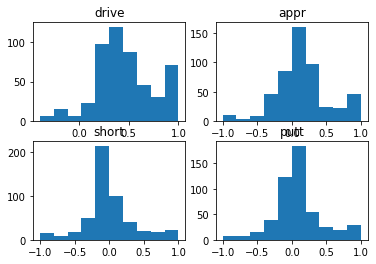

In [15]:
diff_df = pd.DataFrame({'player': enh_p_df['player']})
diff_df['sg_drive_diff'] = player_raw_avg['sg_drive_mean'] - enh_p_df['sg_drive']
diff_df['sg_appr_diff'] = player_raw_avg['sg_appr_mean'] - enh_p_df['sg_appr']
diff_df['sg_short_diff'] = player_raw_avg['sg_short_mean'] - enh_p_df['sg_short']
diff_df['sg_putt_diff'] = player_raw_avg['sg_putt_mean'] - enh_p_df['sg_putt']

print('SG_drive_diff range: ', np.min(diff_df['sg_drive_diff']), ', ', np.max(diff_df['sg_drive_diff']))
print('SG_appr_diff range: ', np.min(diff_df['sg_appr_diff']), ', ', np.max(diff_df['sg_appr_diff']))
print('SG_short_diff range: ', np.min(diff_df['sg_short_diff']), ', ', np.max(diff_df['sg_short_diff']))
print('SG_putt_diff range: ', np.min(diff_df['sg_putt_diff']), ', ', np.max(diff_df['sg_putt_diff']))

fig, ax = plt.subplots(2,2)
ax[0,0].hist(diff_df['sg_drive_diff'])
ax[0,0].set_title('drive')
ax[0,1].hist(diff_df['sg_appr_diff'])
ax[0,1].set_title('appr')
ax[1,0].hist(diff_df['sg_short_diff'])
ax[1,0].set_title('short')
ax[1,1].hist(diff_df['sg_putt_diff'])
ax[1,1].set_title('putt')

SG_drive_diff range:  -1.480894757114773 ,  2.547444536042092
SG_appr_diff range:  -3.414851243189108 ,  1.7697664893397114
SG_short_diff range:  -3.13677779473635 ,  1.7764843959344603
SG_putt_diff range:  -3.9300016759276932 ,  1.2247835511794274


Text(0.5, 1.0, 'putt')

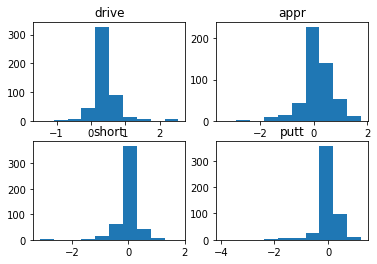

In [13]:
diff_df = pd.DataFrame({'player': p_df['player']})
diff_df['sg_drive_diff'] = player_raw_avg['sg_drive_mean'] - p_df['sg_drive']
diff_df['sg_appr_diff'] = player_raw_avg['sg_appr_mean'] - p_df['sg_appr']
diff_df['sg_short_diff'] = player_raw_avg['sg_short_mean'] - p_df['sg_short']
diff_df['sg_putt_diff'] = player_raw_avg['sg_putt_mean'] - p_df['sg_putt']

print('SG_drive_diff range: ', np.min(diff_df['sg_drive_diff']), ', ', np.max(diff_df['sg_drive_diff']))
print('SG_appr_diff range: ', np.min(diff_df['sg_appr_diff']), ', ', np.max(diff_df['sg_appr_diff']))
print('SG_short_diff range: ', np.min(diff_df['sg_short_diff']), ', ', np.max(diff_df['sg_short_diff']))
print('SG_putt_diff range: ', np.min(diff_df['sg_putt_diff']), ', ', np.max(diff_df['sg_putt_diff']))

fig, ax = plt.subplots(2,2)
ax[0,0].hist(diff_df['sg_drive_diff'])
ax[0,0].set_title('drive')
ax[0,1].hist(diff_df['sg_appr_diff'])
ax[0,1].set_title('appr')
ax[1,0].hist(diff_df['sg_short_diff'])
ax[1,0].set_title('short')
ax[1,1].hist(diff_df['sg_putt_diff'])
ax[1,1].set_title('putt')



# Simple Model

In [5]:
true_p_sg = pd.read_csv('sg_data/simple_p_true.csv').drop('Unnamed: 0', axis = 1).sort_values(by = 'player')
true_c_sg = pd.read_csv('sg_data/simple_csg_true.csv').drop('Unnamed: 0', axis = 1).sort_values(by = 'course')
true_c_dsr = pd.read_csv('sg_data/simple_cdsr_true.csv').drop('Unnamed: 0', axis = 1).sort_values(by = 'course')

# predictions from Julia
pred_p_sg = pd.read_csv('sg_data/simple_plyr_.csv').drop('idx', axis = 1).sort_values(by = 'player')
pred_c_sg = pd.read_csv('sg_data/simple_c_sg_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_c_dsr = pd.read_csv('sg_data/simple_c_dsr_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_obj = pd.read_csv('sg_data/simple_obj_.csv')

pred_noisy_p_sg = pd.read_csv('sg_data/simple_noisy_plyr_.csv').drop('idx', axis = 1).sort_values(by = 'player')
pred_noisy_c_sg = pd.read_csv('sg_data/simple_noisy_c_sg_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_noisy_c_dsr = pd.read_csv('sg_data/simple_noisy_c_dsr_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_noisy_obj = pd.read_csv('sg_data/simple_noisy_obj_.csv')

pred_long_p_sg = pd.read_csv('sg_data/simple_long_plyr_.csv').drop('idx', axis = 1).sort_values(by = 'player')
pred_long_c_sg = pd.read_csv('sg_data/simple_long_c_sg_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_long_c_dsr = pd.read_csv('sg_data/simple_long_c_dsr_.csv').drop('idx', axis = 1).sort_values(by = 'course_name')
pred_long_obj = pd.read_csv('sg_data/simple_long_obj_.csv')

# Simple Model (no noise)

In [22]:
print('Objective: ', pred_obj.iloc[0,0])
print('\nPLAYER SG VALUES: \n')
print('true player SG values: \n', true_p_sg)
print()
print('pred player SG values: \n', pred_p_sg)
print()
print('\nCOURSE SG VALUES: \n')
print('true course SG values: \n', true_c_sg)
print()
print('pred course SG values: \n', pred_c_sg)
print()
print('\nDSR VALUES: \n')
print('true course DSR values: \n', true_c_dsr)
print()
print('pred course DSR values: \n', pred_c_dsr)

Objective:  1.3850651226682664e-08

PLAYER SG VALUES: 

true player SG values: 
   player  SG_drive   SG_appr  SG_short   SG_putt
1   Dick -1.476114 -0.490972 -0.447548 -0.737499
2  Harry -0.042743 -0.164819  0.281618  0.047285
0    Tom  1.518856  0.655791  0.165930  0.690214

pred player SG values: 
   player  sg_drive   sg_appr  sg_short   sg_putt  num_rounds
2   Dick -1.251990 -0.462668 -0.409301 -0.584694         4.0
1  Harry -0.023879 -0.150765  0.261532  0.042855         4.0
0    Tom  1.314097  0.633996  0.155098  0.556971         4.0


COURSE SG VALUES: 

true course SG values: 
   course  SG_drive   SG_appr  SG_short   SG_putt
1   Blue -0.260271 -0.125428 -0.046461 -0.110386
0    Red  0.185908  0.089592  0.033185  0.078847

pred course SG values: 
   course_name  sg_drive   sg_appr  sg_short   sg_putt
1        Blue -0.210257 -0.113095 -0.040301 -0.083226
0         Red  0.172028  0.092532  0.032973  0.068094


DSR VALUES: 

true course DSR values: 
   course  SG_drive   SG_appr 

# Simple Noisy Model

In [4]:
print('Objective: ', pred_noisy_obj.iloc[0,0])
print('\nPLAYER SG VALUES: \n')
print('true player SG values: \n', true_p_sg)
print()
print('pred player SG values: \n', pred_noisy_p_sg)
print()
print('\nCOURSE SG VALUES: \n')
print('true course SG values: \n', true_c_sg)
print()
print('pred course SG values: \n', pred_noisy_c_sg)
print()
print('\nDSR VALUES: \n')
print('true course DSR values: \n', true_c_dsr)
print()
print('pred course DSR values: \n', pred_noisy_c_dsr)

Objective:  0.2268838546712089

PLAYER SG VALUES: 

true player SG values: 
   player  SG_drive   SG_appr  SG_short   SG_putt
1   Dick -1.476114 -0.490972 -0.447548 -0.737499
2  Harry -0.042743 -0.164819  0.281618  0.047285
0    Tom  1.518856  0.655791  0.165930  0.690214

pred player SG values: 
   player  sg_drive   sg_appr  sg_short   sg_putt  num_rounds
2   Dick -1.097199 -0.358320 -0.285505 -0.685325         4.0
1  Harry -0.196320 -0.067217  0.212742  0.000917         4.0
0    Tom  1.323465  0.457633  0.321182  0.808674         4.0


COURSE SG VALUES: 

true course SG values: 
   course  SG_drive   SG_appr  SG_short   SG_putt
1   Blue -0.260271 -0.125428 -0.046461 -0.110386
0    Red  0.185908  0.089592  0.033185  0.078847

pred course SG values: 
   course_name  sg_drive   sg_appr  sg_short   sg_putt
1        Blue -0.179060 -0.075340 -0.347910 -0.426592
0         Red  0.149113  0.043244  0.099492  0.302325


DSR VALUES: 

true course DSR values: 
   course  SG_drive   SG_appr  SG_

# Simple Long Model (3 copies of 12 = 36)

In [6]:
print('Objective: ', pred_long_obj.iloc[0,0])
print('\nPLAYER SG VALUES: \n')
print('true player SG values: \n', true_p_sg)
print()
print('pred player SG values: \n', pred_long_p_sg)
print()
print('\nCOURSE SG VALUES: \n')
print('true course SG values: \n', true_c_sg)
print()
print('pred course SG values: \n', pred_long_c_sg)
print()
print('\nDSR VALUES: \n')
print('true course DSR values: \n', true_c_dsr)
print()
print('pred course DSR values: \n', pred_long_c_dsr)

Objective:  0.2696232621540381

PLAYER SG VALUES: 

true player SG values: 
   player  SG_drive   SG_appr  SG_short   SG_putt
1   Dick -1.476114 -0.490972 -0.447548 -0.737499
2  Harry -0.042743 -0.164819  0.281618  0.047285
0    Tom  1.518856  0.655791  0.165930  0.690214

pred player SG values: 
   player  sg_drive   sg_appr  sg_short   sg_putt  num_shots
2   Dick -1.288188 -0.572568 -0.473643 -0.543611       12.0
1  Harry  0.003193 -0.154700  0.299407  0.108375       12.0
0    Tom  1.263308  0.773850  0.077372  0.674808       12.0


COURSE SG VALUES: 

true course SG values: 
   course  SG_drive   SG_appr  SG_short   SG_putt
1   Blue -0.260271 -0.125428 -0.046461 -0.110386
0    Red  0.185908  0.089592  0.033185  0.078847

pred course SG values: 
   course_name  sg_drive   sg_appr  sg_short   sg_putt
1        Blue -0.142290 -0.242631  0.125962 -0.447353
0         Red  0.163977  0.196049 -0.029097  0.207780


DSR VALUES: 

true course DSR values: 
   course  SG_drive   SG_appr  SG_shor